# Pipeline for Simulating GRNS on Sergio & Packing into Anndata object

First, create the files 

Import the necessary modules

In [79]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
from pyslingshot import Slingshot #for simulating pseudotimes
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../SERGIO'))
from SERGIO.sergio import sergio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Simulate the GRN and save the splicing data to files

In [80]:
df = pd.read_csv('experiments_final/num_6/perturbed_matrix.tab', sep='\t', header=None, index_col=None)
bMat = df.values
print('here')
#rows and cols correspond to genes and cells (just verify)
# 100 x (6 x 300 )
#  100 genes, 6 cell types, 6 bins of 300 cells per cell type
# DO NOT include MR in the gene count
# make sure that all cells are tab separated and that zeros are just 0
# genes that are ONLY affector genes in the grn MUST be included as MR in the MR file
sim = sergio(number_genes=10, number_bins = 4, number_sc = 300, noise_params = 0.2, decays=0.8, sampling_state = 1, noise_params_splice = 0.07, noise_type='dpd', dynamics=True, bifurcation_matrix= bMat)
sim.build_graph(input_file_taregts ='experiments_final/num_6/gene_interactions.txt', input_file_regs='experiments_final/num_6/master_regulators.txt', shared_coop_state=2)
sim.simulate_dynamics()
# final ct matrix is the sum of U and S
#spliced matrix, unspliced, sum of both, pseudotime (probs just a vector bc each element in pseudotime is 1d scalar for 1 cell)
exprU, exprS = sim.getExpressions_dynamics()
exprU_clean = np.concatenate(exprU, axis = 1)
print(exprU_clean)
print(exprU_clean.shape)

exprS_clean = np.concatenate(exprS, axis = 1)
print(f"exprU_clean shape: {exprU_clean.shape}")
print(f"exprS_clean shape: {exprS_clean.shape}")

# Print the number of columns for each row
for i, row in enumerate(exprU_clean):
    print(f"Row {i} of exprU_clean has {len(row)} columns")

for i, row in enumerate(exprS_clean):
    print(f"Row {i} of exprS_clean has {len(row)} columns")

# Optionally save to text files
np.savetxt('exprU_clean.txt', exprU_clean, delimiter=' ', fmt='%f')
np.savetxt('exprS_clean.txt', exprS_clean, delimiter=' ', fmt='%f')


here
bindict

=== Starting bin 0 ===

=== Starting simulation for binID: 0 ===
Number of initial cells: 15


--- Iteration step: 0 ---

Simulating gene 0
prod_rate_U mean: 0.6739, decay_U mean: 0.6767
prod_rate_S mean: 0.6767, decay_S mean: 0.6790

Simulating gene 1
prod_rate_U mean: 0.6922, decay_U mean: 0.6913
prod_rate_S mean: 0.6913, decay_S mean: 0.6996

Simulating gene 2
prod_rate_U mean: 0.9459, decay_U mean: 0.9470
prod_rate_S mean: 0.9470, decay_S mean: 0.9259

Simulating gene 3
prod_rate_U mean: 1.3876, decay_U mean: 1.4034
prod_rate_S mean: 1.4034, decay_S mean: 1.3736

Simulating gene 4
prod_rate_U mean: 2.2958, decay_U mean: 2.3198
prod_rate_S mean: 2.3198, decay_S mean: 2.3210

Simulating gene 5
prod_rate_U mean: 0.9476, decay_U mean: 0.9666
prod_rate_S mean: 0.9666, decay_S mean: 0.9753

Simulating gene 6
prod_rate_U mean: 2.5617, decay_U mean: 2.5484
prod_rate_S mean: 2.5484, decay_S mean: 2.5409

Simulating gene 7
prod_rate_U mean: 1.1152, decay_U mean: 1.1111
prod_rat

In [81]:
exprTotal_clean = exprU_clean + exprS_clean
print(f"exprTotal_clean shape: {exprTotal_clean.shape}")
np.savetxt('exprTotal_clean.txt', exprTotal_clean, delimiter=' ', fmt='%f')


exprTotal_clean shape: (10, 1200)


# Compute pseudotimes

First create the txt file from csv to find the pseudotimes

In [82]:
# import os

# def csv_to_txt(input_csv, output_folder="data/output"):
#     os.makedirs(output_folder, exist_ok=True)
#     output_txt = os.path.join(output_folder, os.path.basename(input_csv).replace(".csv", ".txt"))

#     with open(input_csv, 'r') as csv_file, open(output_txt, 'w') as txt_file:
#         for line in csv_file:
#             txt_file.write(line.replace(',', ' '))

#     print(f"Saved to {output_txt}")

# # Example usage in Jupyter Notebook
# input_csv = "--"  # Change this as needed
# csv_to_txt(input_csv)

#questions for wenjun: 
#what is the meaning of all of these instances of simulated csvs? are they all for the same grn and am i supposed to simulate all of them?
#for some reason when I transform the csv to txt, it's missing a single column header due to the nature of the data  
#help me figure out wt is going on w sergio


In [83]:
# data = np.loadtxt( "data_linear.txt" )

#data = np.load("data_bifurcate.npy")
def analyze_txt(input_txt):
    with open(input_txt, 'r') as txt_file:
        expected_columns = None
        for i, line in enumerate(txt_file):
            columns = line.strip().split()  # Split line into columns based on spaces
            num_columns = len(columns)
            
            if expected_columns is None:
                expected_columns = num_columns  # Set initial expected columns
            
            if num_columns != expected_columns:
                print(f"Column mismatch at row {i}: expected {expected_columns}, found {num_columns}")
            
            print(f"Row {i}: {num_columns} columns")  # Print column count for each row

# Example usage
input_txt = 'exprTotal_clean.txt'  # Replace with your actual TXT file path
analyze_txt(input_txt)

data = np.loadtxt( "exprTotal_clean.txt" )


Row 0: 1200 columns
Row 1: 1200 columns
Row 2: 1200 columns
Row 3: 1200 columns
Row 4: 1200 columns
Row 5: 1200 columns
Row 6: 1200 columns
Row 7: 1200 columns
Row 8: 1200 columns
Row 9: 1200 columns


In [84]:
data.shape

(10, 1200)

/var/folders/6s/mn0cx1qn7b901qdgrbh6z_hm0000gp/T/ipykernel_86170/3084148856.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


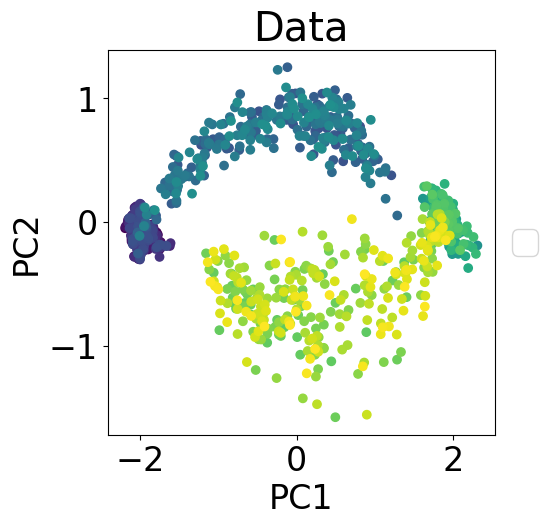

In [85]:
plt.rcParams["figure.figsize"] = (5,5)
        # PCAs:
from sklearn.decomposition import PCA
plt.rcParams["font.size"] = 24
pca = PCA(n_components=6)
Xt_all = pca.fit_transform(np.log2(data.T+1) ) 
plt.scatter(Xt_all[:,0],Xt_all[:,1], c=range(Xt_all.shape[0]) )
#         for j in range(Nt):
#             idx = range(num_cells_per_time*j, num_cells_per_time*(j+1))
#             plt.plot(Xt_all[idx,0],Xt_all[idx,1],'o-')
       
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
plt.show()

In [86]:
Xt_all.shape

(1200, 6)

In [87]:
# from sklearn.cluster import KMeans
from anndata import AnnData
# num_clusters = 9  # Set the number of clusters you want for KMeans

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(Xt_all)  # Using PCA components for clustering
cluster_labels = np.zeros( (1200) )
cluster_labels[0:300] = 0
cluster_labels[300:600] = 1
cluster_labels[600:900] = 2
cluster_labels[900:1200] = 3
# cluster_labels[400:500] = 4
cluster_labels=np.int8(cluster_labels)

In [88]:
cluster_labels[0]

0

Create anndata obj

In [89]:
num_cells = data.shape[1]
num_genes = data.shape[0]
ad = AnnData(data.T)
ad.obsm["X_umap"] = Xt_all[:,0:2]
ad.obs["celltype"] = cluster_labels

In [90]:
cluster_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int8)

/Users/JenChen/Desktop/otvelo/researchy/lib/python3.9/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[0, 1], Lineage[0, 3, 2]]


  0%|          | 0/1 [00:00<?, ?it/s]/Users/JenChen/Desktop/otvelo/researchy/lib/python3.9/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @0 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7fdcc8633100>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7fdceea2ebb0>]
Shrinking branch @0 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7fdcc8633100>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7fdceea2ebb0>]


100%|██████████| 1/1 [00:04<00:00,  4.46s/it]


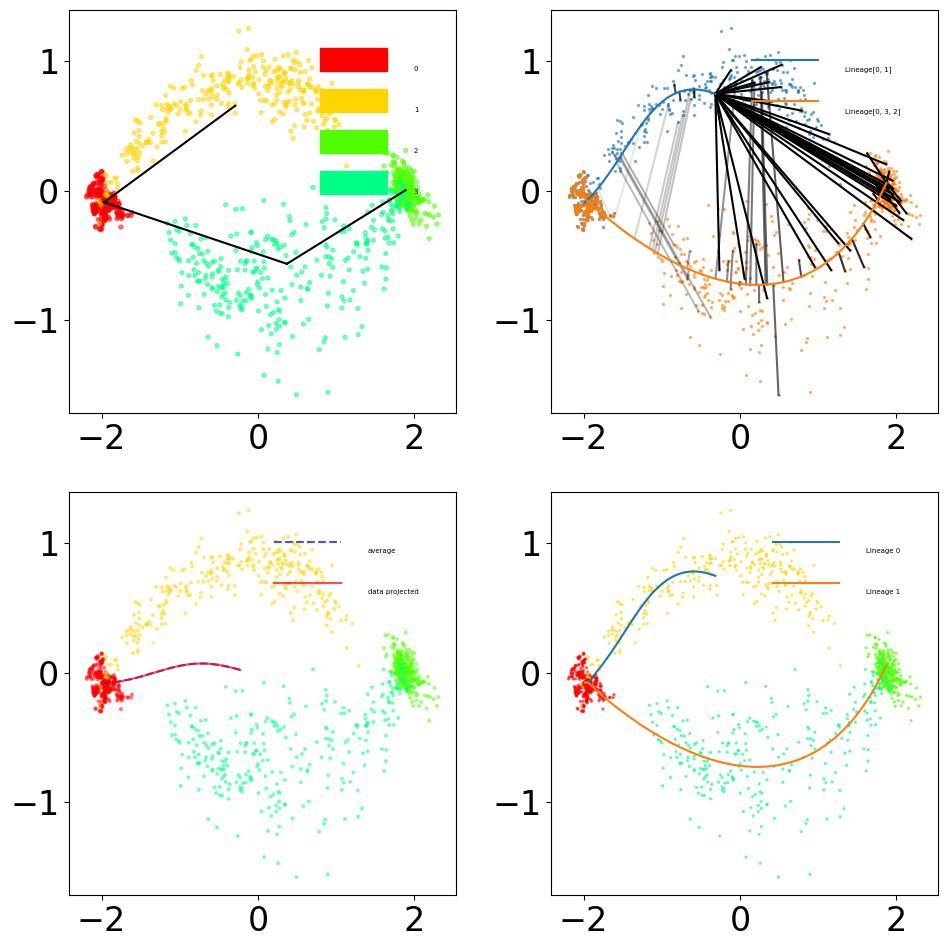

In [91]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)

slingshot = Slingshot(ad, celltype_key="celltype", obsm_key="X_umap", start_node=0, debug_level='verbose')


slingshot.fit(num_epochs=1, debug_axes=axes)

# Adjust legend size
# Tuck every legend into its own upper-right corner, small and unobtrusive
for ax in axes.flatten():
    # First, see if there’s an existing Legend instance
    legend = ax.get_legend()
    if legend is not None:
        # reposition the existing legend
        legend.set_loc('upper right')
        legend.set_bbox_to_anchor((0.98, 0.98))
        legend.set_frame_on(False)
        # shrink text
        legend.set_title(legend.get_title().get_text(), prop={'size': 6})
        for txt in legend.get_texts():
            txt.set_fontsize(5)
    else:
        # fallback: no legend instance, so build one from handles/labels
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            ax.legend(
                handles, labels,
                loc='upper right',
                bbox_to_anchor=(0.98, 0.98),
                frameon=False,
                fontsize=8,
                title_fontsize=10,
                borderaxespad=0.1
            )

plt.tight_layout()  # Optional: improves spacing
plt.savefig("experiments_final/num_6/slingshot_output.png", dpi=300)  # Saves the figure as a PNG with high resolution



In [92]:
pseudotime = slingshot.unified_pseudotime
ad.obs["pseudotime"] = slingshot.unified_pseudotime

print(type(slingshot.unified_pseudotime))  # Check the object type
print(slingshot.unified_pseudotime.shape)  # Check its dimensions
print(slingshot.unified_pseudotime[:5])    # Print first few values


<class 'numpy.ndarray'>
(1200,)
[0.         0.         0.27538619 0.         0.        ]


Add splicing data to anndata object also

In [93]:
spliced_data = np.loadtxt("exprS_clean.txt") #spliced RNA
unspliced_data = np.loadtxt("exprU_clean.txt") #unspliced RNA

# Ensure the shape matches adata.X (genes x cells)
print(spliced_data.shape)  # Should be (num_genes, num_cells)
print(unspliced_data.shape)  # Should be (num_genes, num_cells)
print(ad.layers.keys())
# Transpose if necessary (AnnData assumes cells x genes)
if spliced_data.shape[1] == ad.n_obs and spliced_data.shape[0] == ad.n_vars:
    ad.layers["spliced"] = spliced_data.T  # Ensure it aligns with AnnData structure
    print('done w spliced')
else:
    raise ValueError("Shape mismatch! Check if genes and cells are correctly aligned.")

if unspliced_data.shape[1] == ad.n_obs and unspliced_data.shape[0] == ad.n_vars:
    ad.layers["unspliced"] = unspliced_data.T  # Ensure it aligns with AnnData structure
    print('done w unspliced')
else:
    raise ValueError("Shape mismatch! Check if genes and cells are correctly aligned.")

# Print splicing data info
print("spliced data shape:", ad.layers["spliced"].shape)
print("spliced data (first 5 genes, first 5 cells):\n", ad.layers["spliced"][:5, :5])
print("unspliced data shape:", ad.layers["unspliced"].shape)
print("unspliced data (first 5 genes, first 5 cells):\n", ad.layers["unspliced"][:5, :5])

# Print pseudotime data info
print("Pseudotime data shape:", ad.obs["pseudotime"].shape)
print("Pseudotime values (first 10 cells):\n", ad.obs["pseudotime"].head(10))
print(ad.layers.keys())
ad.write("custom_ad.h5ad")


(10, 1200)
(10, 1200)
KeysView(Layers with keys: )
done w spliced
done w unspliced
spliced data shape: (1200, 10)
spliced data (first 5 genes, first 5 cells):
 [[ 3.494899  3.401371  4.792954  6.623949 11.711578]
 [ 3.409511  3.50389   4.718428  7.302955 11.303706]
 [ 3.894893  3.546312  4.281274  6.92526  11.099751]
 [ 3.335704  3.353931  4.44273   6.94342  11.708778]
 [ 3.431765  3.526555  4.554271  6.921972 12.0319  ]]
unspliced data shape: (1200, 10)
unspliced data (first 5 genes, first 5 cells):
 [[0.929412 0.86119  1.259691 1.745884 2.87329 ]
 [0.444931 0.753681 1.238535 1.885749 3.201318]
 [0.884702 1.011871 1.061918 1.440698 3.459898]
 [0.598834 0.72429  0.762411 1.980812 2.983151]
 [1.273736 0.948928 1.120818 1.75929  2.733546]]
Pseudotime data shape: (1200,)
Pseudotime values (first 10 cells):
 0    0.000000
1    0.000000
2    0.275386
3    0.000000
4    0.000000
5    0.102392
6    0.034281
7    0.000000
8    0.000000
9    0.000000
Name: pseudotime, dtype: float64
KeysView(La

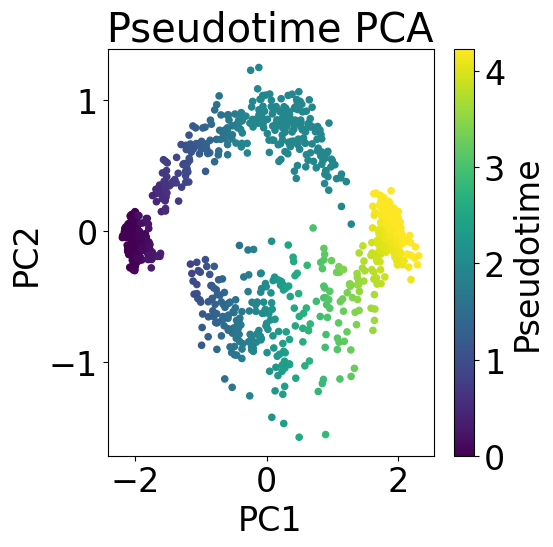

In [94]:
plt.rcParams["figure.figsize"] = (6,6)
        # PCAs:
from sklearn.decomposition import PCA
plt.rcParams["font.size"] = 24
pca = PCA()
Xt_all = pca.fit_transform(np.log2(data.T+1) ) 
# sc = plt.scatter(Xt_all[:,0],Xt_all[:,1], c=pseudotime )
sc = plt.scatter(Xt_all[:, 0], Xt_all[:, 1], c=pseudotime, cmap='viridis', s=20)

#         for j in range(Nt):
#             idx = range(num_cells_per_time*j, num_cells_per_time*(j+1))
#             plt.plot(Xt_all[idx,0],Xt_all[idx,1],'o-')
#how to keep track of which cell is corr to which branch

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pseudotime PCA')

# Add a colorbar to show pseudotime scale
cbar = plt.colorbar(sc)
cbar.set_label('Pseudotime')

plt.tight_layout()
plt.savefig("experiments_final/num_6/pseudotime_pca_mr.png", dpi=300)  # Saves as a high-resolution PNG
plt.show()
